In [1]:
"""hands_on_session_Monday.ipynb: notebook for the first hands-on session of the Summer School of the Institute of Space Sciences"""

__author__ = "Vanessa Graber"
__copyright__ = "Copyright 2021"
__credits__ = ["Vanessa Graber"]
__license__ = "MIT"
__maintainer__ = "Vanessa Graber"
__email__ = "graber@ice.csic.es"

# Hands-on Session Monday, 12th July 2021
## ICE SUMMER SCHOOL 2021
### by Vanessa Graber

# <ins>Part I - Introdution to scikit-learn </ins> 

We will start this hands-on session with a brief introduction to a popular `Python`-based library for machine learning, `scikit-learn`, which provides access to many classification, regression and clustering algorithms. For a detailed overview of the full functionality and additional examples see the official website https://scikit-learn.org/stable/. Some of the following examples are based on the book *Python Data Science Handbook: Essential Tools for Working with Data* by Jake VanderPlas, which you can find here https://jakevdp.github.io/PythonDataScienceHandbook/.

For visualisation purposes, we will use `seaborn` https://seaborn.pydata.org/, a `Python` data visualisation library that is based on `matplotlib`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='colorblind', 
              font='sans-serif', 
              font_scale=1.2, 
              color_codes=True)

In [4]:
# !pip install scikit-learn==0.23

## I.1 Data sets

A machine learning (ML) problem typically starts with a dataset. In order to get familiar with ML libraries it's often useful to start with standard, well-known toy datasets that are readily available in `scikit-learn` or `seaborn`. To get started, we will take advantage of the so-called **Iris flower dataset** https://en.wikipedia.org/wiki/Iris_flower_data_set that we can load as a `Pandas` data frame using `seaborn`. For additional information on the `Pandas` data analysis library, which we will use again below, see https://pandas.pydata.org/.

<img src="./flower.jpg" width="340">

In [5]:
data_iris = sns.load_dataset('iris')
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Each row represents an individual flower (*the samples*) and the first four columns denote different characteristics of each flower (*the features*). This information is combined into a two-dimensional *feature matrix* X with shape 'number of samples' x 'number of features'. In order to take advantage of `scikit-learn`, we typically require this feature matrix in form of a `NumPy` array or a `Pandas` data frame. 

In addition to the matrix X, we often also have an *array of labels* (or targets) y (the final `species` column above), which is usually one dimensional and the quantity we want to predict from the data. Depending on the problem, it can either contain discrete labels or a continuous numerical value. When using `scikit-learn`, we typically require the target array in form of a `NumPy` array or a `Pandas` series. 

With the above `species` column in mind, we can get a first impression of the data and their properties using `pairplot` to highlight pairwise relationships between different features. Along the diagonal, we opt for marginal histograms.

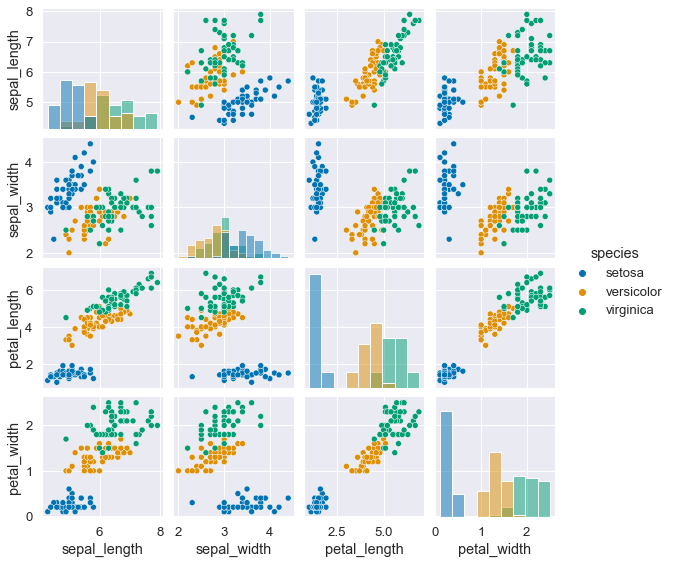

In [6]:
sns.pairplot(data_iris, hue='species', height=2, diag_kind='hist');
plt.show();

From the data frame, we can now extract the feature matrix and the label vector:

In [7]:
X_iris = data_iris.drop('species', axis=1)
print(X_iris.shape)
X_iris.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y_iris = data_iris['species']
print(y_iris.shape)
y_iris[:10]

(150,)


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object

## I.2 Scikit-learn API

Whenever using `scikit-learn`, we can take advantage of its Estimator API that follows a **fixed and consistent schematic** for different kinds of ML algorithms. Specifically, using the API relies on the following five steps 
* A: choose a ML model by importing the respective class from `scikit-learn`
* B: select hyperparameters by instantiating the class with those values
* C: structure data into feature matrix and label/target vector
* D: fit model to data by calling the `fit()` method of respective class instance
* E: apply model to new data using the `predict()` method

Before we return to the Iris dataset, let's look at a simpler dataset of scattered points with coordinates (x,y). We want to fit a straight line through these points, i.e., we are looking at a **linear regression problem**. To generate the data, we can take advantage of `NumPy`'s random sampling routines and distribute points around a line of slope 2 and intercept of -1.

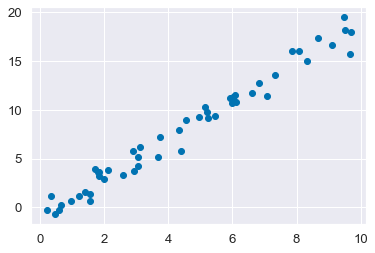

In [9]:
fig, ax = plt.subplots()

# Fix random state to obtain same results
from numpy.random import RandomState
rng = RandomState(42) 

x_regression = 10 * rng.rand(50)
y_regression = 2 * x_regression - 1 + rng.randn(50)

plt.scatter(x_regression, y_regression);
plt.show();

**Step A:** select the model and load `scipy's` linear regression class (details here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [10]:
from sklearn.linear_model import LinearRegression

**Step B:** instantiate class and select hyperparameters (e.g. offset, normalisation)

In [11]:
model_regression = LinearRegression(fit_intercept=True)

**Step C:** reshape data and turn 1D vector into feature matrix

In [12]:
x_regression
print(x_regression.shape)

(50,)


In [13]:
X_regression = x_regression[:, np.newaxis]
print(X_regression.shape)

(50, 1)


**Step D:** fit model to data

In [14]:
model_regression.fit(X_regression, y_regression)

LinearRegression()

This last step executes several internal computations and model specific results (the learned parameters) are stored accordingly. We can access them using trailing underscores. In our example, we can extract the slope of the fit line and its intercept, which are close to our original input of 2 and -1.

In [15]:
model_regression.coef_

array([1.9776566])

In [16]:
model_regression.intercept_

-0.9033107255311164

**Step E:** predict on unknown data using the trained model (for this simple example, generate *new* x-values; make sure shape is equivalent)

In [17]:
x_regression_predict = np.linspace(-1, 11)
X_regression_predict = x_regression_predict[:, np.newaxis]
y_regression_predict = model_regression.predict(X_regression_predict)

We can plot this *prediction* graphically

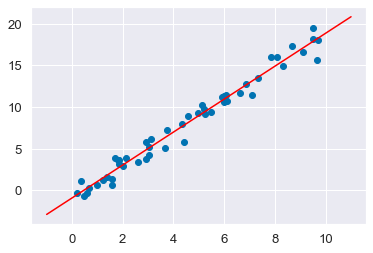

In [18]:
fig, ax = plt.subplots()
plt.scatter(x_regression, y_regression)
plt.plot(x_regression_predict, y_regression_predict, color='red');
plt.show();

## I.3 Iris clustering

Now that we have introduced the API structure, let's return to our Iris flower dataset. We could ask a number of questions that would require different choices of ML models. As we will look at clustering in more detail, we will attempt to recover the three *species* of our flower dataset without actually providing the labels. This is a type of **unsupervised learning** problem. One popular approach that we will look at in the following is the so-called Gaussian mixture model https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html, which aims to model the data as a set of Gaussian blobs.

Following the standard API set-up, we execute the following steps:

In [19]:
from sklearn.mixture import GaussianMixture  # step A - choose model
model_iris = GaussianMixture(n_components=3, covariance_type='full')  # step B - generate instance
model_iris.fit(X_iris)  # step D - fit the data; no labels in this case
y_iris_predict = model_iris.predict(X_iris)  # step E - predict the labels

What we obtain is a numerical representation of the three different clusters identified by our Gaussian mixture model:

In [20]:
y_iris_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To illustrate this result, we can first add the new label to the original data frame and then e.g. plot two of the features against each other and compare the original labels and the new ones:

In [21]:
data_iris['prediction'] = y_iris_predict

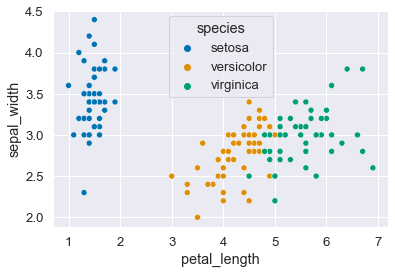

In [22]:
sns.scatterplot(data=data_iris, x='petal_length', y='sepal_width', hue='species');
plt.show();

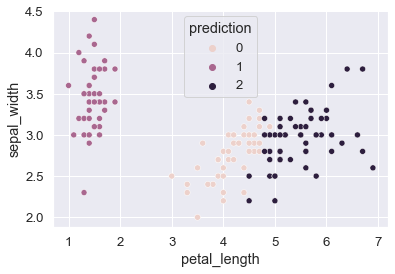

In [23]:
sns.scatterplot(data=data_iris, x='petal_length', y='sepal_width', hue='prediction');
plt.show();

Apart from a few cases, we are able to recover the correct groups without knowing the different labels. In the following, we will look in more detail into these kinds of algorithms and their properties and accuracy.

# <ins>Part II - Clustering algorithms </ins> 

## II.1 The problem

Let's assume that someone is giving you a dataset where each object is characterised by a number of features (e.g. numerical values). You know very little about the objects themselves, but you are tasked with gathering more information. One of the first steps when exploring the data would be to see if you can find certain similarities between some of the objects, i.e., you would like to know if it is possible to **group** some of the **data points together**. The existence of different **clusters** would then allow us to learn more about the underlying objects associated with the data (very much like we did in our Iris dataset above).

This is an example of unsupervised machine learning and many different clustering algorithms exist, each of them having different advantages or disadvantages depending on the problem at hand. As such the notion of a cluster can differ significantly between different datasets or the questions to be addressed. 

## II.2 k-means clustering

We will start with the so-called **k-means clustering** https://en.wikipedia.org/wiki/K-means_clustering, which is a **centroid-based** approach, where a pre-specified number of clusters are represented by their centres and each data point accordingly assigned to the nearest one.

### II.2.1 An example

Before going into the details, let's have a look at a simple example using `scikit-learn`. First of all, we will generate a random set of five isotropic Gaussian clusters using the `make_blobs` module. We create data (400 data points in the example below) with two features stored in a matrix `X_blobs`, an array of the true cluster labels `y_blobs_true` and the position of the respectives cluster centers `centrrs_blobs_true`. Note that we fix the seed of the random number generator `random_state` to allow for reproducibility:

In [24]:
from sklearn.datasets import make_blobs

X_blobs, y_blobs_true, centres_blobs_true = make_blobs(n_samples=400, 
                                                       n_features=2, 
                                                       centers=5, 
                                                       cluster_std=0.70, 
                                                       random_state=42,
                                                       center_box=(-7, 7),
                                                       return_centers=True)

In [25]:
X_blobs[:5]

array([[-3.66426163, -4.99040194],
       [ 3.23328407,  1.46334795],
       [-4.73153209, -4.45596953],
       [-6.52815379,  4.82367531],
       [ 3.91571642,  1.83719265]])

In [26]:
y_blobs_true[:5]

array([2, 1, 2, 3, 1])

In [27]:
centres_blobs_true

array([[-1.75643834,  6.31000029],
       [ 3.24791519,  1.38121878],
       [-4.81573903, -4.81607672],
       [-6.18682943,  5.12646604],
       [ 1.41561016,  2.91301609]])

We can plot these in a scatter plot to visualise the different clusters and colour them according to their cluster label:

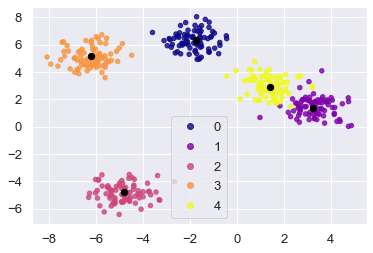

In [28]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0],
    X_blobs[:, 1],
    c=y_blobs_true,
    s=20,
    cmap="plasma",
    alpha=0.8,
)
plt.scatter(
    centres_blobs_true[:, 0], centres_blobs_true[:, 1], s=40, color="black"
)
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

If we wanted to identify the five clusters by eye solely using their two features (without the colour information), it would be relatively straight forward to do so. We now want to check if the implementation of the k-means clustering algorithm is able to do the same. To do so, we take advantage of the API and excute the steps outlined above.

In [29]:
from sklearn.cluster import KMeans  # step A - choose model

kmeans = KMeans(n_clusters=5, random_state=42)  # step B - generate instance
kmeans.fit(X_blobs)  # step D - fit the data; no labels in this case
y_blobs_predict = kmeans.predict(X_blobs)  # step E - predict the labels

We can directly extract the cluster centre positions and compare to the true ones:

In [30]:
centres_blobs_predict = kmeans.cluster_centers_
print(centres_blobs_predict)

[[ 1.37895803  2.94607852]
 [-6.22337184  5.08812811]
 [-4.812946   -4.85346126]
 [-1.85209147  6.30959171]
 [ 3.35351316  1.39317318]]


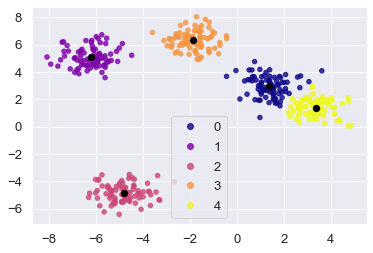

In [31]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0],
    X_blobs[:, 1],
    c=y_blobs_predict,
    s=20,
    cmap="plasma",
    alpha=0.8,
)
plt.scatter(
    centres_blobs_predict[:, 0], centres_blobs_predict[:, 1], s=40, c="black"
)
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

When comparing the true cluster centers or the color (i.e. the index) for each cluster with the predictions, we note that their integer labels, i.e., their positions in the `centers` arrays, as well as their labels are not given in the same order, but can be permuted.

In [32]:
print('true centres:', centres_blobs_true)
print('predicted centres:', centres_blobs_predict)

true centres: [[-1.75643834  6.31000029]
 [ 3.24791519  1.38121878]
 [-4.81573903 -4.81607672]
 [-6.18682943  5.12646604]
 [ 1.41561016  2.91301609]]
predicted centres: [[ 1.37895803  2.94607852]
 [-6.22337184  5.08812811]
 [-4.812946   -4.85346126]
 [-1.85209147  6.30959171]
 [ 3.35351316  1.39317318]]


We can correct for that in the following way:

In [33]:
y_blobs_predict_ordered = np.zeros_like(y_blobs_true)

for i in range(5):
    # Make a Boolean mask with True for each integer label
    mask = (y_blobs_predict == i) 
    # Find the correct label for the mask and replace the values
    y_blobs_predict_ordered[mask] = y_blobs_true[mask][0]

Plotting the adjusted results, we obtain

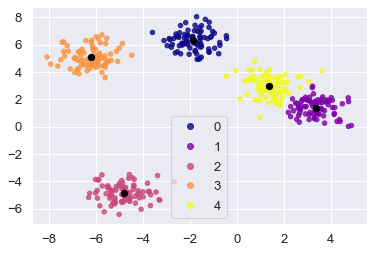

In [34]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0],
    X_blobs[:, 1],
    c=y_blobs_predict_ordered,
    s=20,
    cmap="plasma",
    alpha=0.8,
)
plt.scatter(
    centres_blobs_predict[:, 0], centres_blobs_predict[:, 1], s=40, c="black"
)
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

For comparison, again the original data:

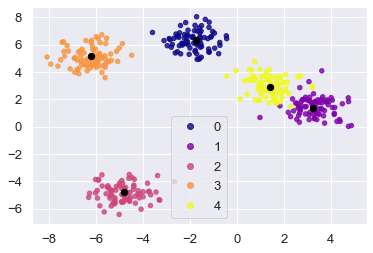

In [35]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0],
    X_blobs[:, 1],
    c=y_blobs_true,
    s=20,
    cmap="plasma",
    alpha=0.8,
)
plt.scatter(
    centres_blobs_true[:, 0], centres_blobs_true[:, 1], s=40, color="black"
)
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

By eye, we direcly observe that the majority of the points have been grouped into their *correct* cluster, as we would expect. Only for the yellow and the purple groups, which are relatively close to each other, we note that a few points are assigned the wrong label / colour. 

We can make this comparison more quantitative by for example calculating the `accuracy_score` of our inferred labels using the respective `scikit-learn` function in the `metrics` module (for more details on evaluating models see https://scikit-learn.org/stable/modules/model_evaluation.html). The closer the value to 1, the better the prediction.

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_blobs_true, y_blobs_predict_ordered)

0.98

A useful tool to determine where the mismatch between the true labels and predictions is happening, is the so-called **confusion matrix**. We can use the relevant `scikit-learn` function in the `metrics` module to compute the confusion matrix and plot the results in form of a heat map. The diagonal represents those instances, where the predicted and true labels agree, while the off-diagonal elements represent the mislabelled cases.

In [37]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_blobs_true, y_blobs_predict_ordered)

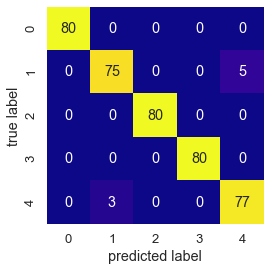

In [38]:
sns.heatmap(
    conf_mat, square=True, annot=True, fmt="d", cbar=False, cmap="plasma"
)
plt.ylabel("true label")
plt.xlabel("predicted label")
plt.show();

### II.2.2 Direct Implementation

Having seen how the k-means algorithm acts, let's look into **how the cluster solution is actually found**. Instead of comparing all possible options (which would take way too long for a large dataset), the algorithm relies on an **iterative process** that gets refined at each step. This is based on the concept of **an expectation-maximisation algorithm** that in its simplest form can be summarised as follows: 

* (i) guess some initial cluster centers dependent on the specified number, 
* (ii) assign all the data points to the nearest cluster center (the expectation step), 
* (iii) recalculate the means for all data points within each clusters (the maximisation step), 
* (iv) repeat steps (ii) and (iii) until the procedure has converged, e.g., the assignments remain the same or the cluster centers do not shift any more (within some limit). 

For a video illustration of these steps see https://www.youtube.com/watch?v=5I3Ei69I40s.

As such this implementation essentially aims to minimise the overall distance between all datapoints and their respective cluster centers. We can implement this sometimes referred to as *naive* form of the k-means algorithm in `python`.

In [39]:
def kmeans_naive(data, n_clusters, seed=42):
    # Initialize the random cluster centres, fix seed for reproducibility
    np.random.seed(seed)
    cluster_indices = np.random.randint(data.shape[0], size=n_clusters)
    centres = data[cluster_indices]

    # Repeating the E-M steps in a while loop until centre assignments remain the same
    while True:

        # Make an empty array to store current integer label for each data point
        labels = np.zeros(data.shape[0])

        # Loop over each point in the dataset to group data
        for i, d in enumerate(data):

            # Make an empty array to store distance to each cluster
            distances = np.zeros(n_clusters)

            # Calculate distance between point and cluster centre
            for j, c in enumerate(centres):
                distances[j] = np.linalg.norm(d - c)

            # Determine the minimum distance and use the cluster index as a label
            labels[i] = np.argmin(distances)

        # Find the new cluster centres from means of each group
        centres_updated = np.array(
            [data[labels == k].mean(0) for k in range(n_clusters)]
        )

        # Condition to break loop
        if np.all(centres == centres_updated):
            break

        # Reassign the new center values
        centres = centres_updated

    return labels, centres

In [40]:
y_naive, centres_naive = kmeans_naive(X_blobs, n_clusters=5)

As before, we can plot our results

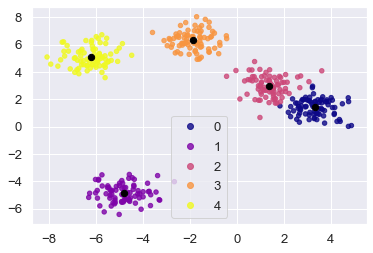

In [41]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0], X_blobs[:, 1], c=y_naive, s=20, cmap="plasma", alpha=0.8
)
plt.scatter(centres_naive[:, 0], centres_naive[:, 1], s=40, c="black")
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

We observe that our simple implementation is indeed able to recover the clusters of our distribution. As above, labels can be permuted and we would have to adjust for the correct labels in order to determine the accuracy of our algorithm. 

In [42]:
y_naive_ordered = np.zeros_like(y_blobs_true)

for i in range(5):
    # Make a Boolean mask with True for each integer label
    mask = (y_naive == i) 
    # Find the correct label for the mask and replace the values
    y_naive_ordered[mask] = y_blobs_true[mask][0]

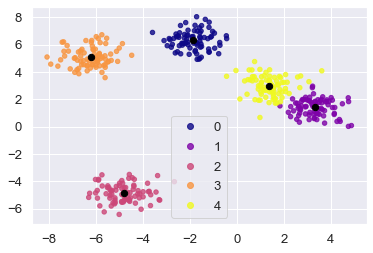

In [43]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    X_blobs[:, 0],
    X_blobs[:, 1],
    c=y_naive_ordered,
    s=20,
    cmap="plasma",
    alpha=0.8,
)
plt.scatter(centres_naive[:, 0], centres_naive[:, 1], s=40, c="black")
ax.legend(*scatter.legend_elements(), loc="best")
plt.show();

We can now determine the accuracy score to show that our implementation works as well as the scikit-learn implemenation (for this simple example)

In [44]:
accuracy_score(y_blobs_true, y_naive_ordered)

0.9825

### II.2.3 DISCUSSION SESSION: Potential problems

In our very simple example, the k-means algorithm allows us to assign (almost all) data points to their *correct* cluster. However, the situation we considered is somewhat idealised and we relied on a couple of inherent assumptions. Can you think of potential issues with this k-means approach? How would the data have to look like to make our cluster prediction less successful/accurate?

### II.2.4 Elbow method

When we are trying to identify certain clusters in a dataset, we typically do not know the number of clusters present. This is often one of the parameters, we actually want to determine. One common method to determine the optimal number of clusters is the **elbow method** (details here https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Its main idea is to plot some **measure of variation** of the  dataset as a function of the number of clusters, and then select the curve's *elbow* (or the *knee*) as the number of ideal clusters. This elbow basically marks the point where we do not gain *more information* by adding additional clusters; doing so will instead lead to overfitting (and splitting of correct clusters into subclusters). Note, however, that this approach is a heuristic one, as this elbow is not always sharp feature and cannot always be unambiguously identified. 

<img src="./elbow.jpg" width="340">

What remains to be determined is the parameter (the quantity along the y-axis) that we analyse as a function of the cluster number. We need to find a measure that accounts for the variation or dispersion of a given dataset. In our k-means example above we are optimising the **distance between the cluster centres and each data point** for the case of k=5. One way to measure the dispersion of the data would thus be to look at this distance (for the converged assignments) as a function of clusters.

In `scikit-learn`, we can directly access the overall sum of squared distances of samples to their closest cluster center by calling the `inertia_` attribute (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). We repeat our analysis from above for different cluster numbers to obtain the following curve:

In [45]:
dist_sum = []
n_clusters = range(1, 12)

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_blobs)
    # Take square root of inertia parameter to obtain sum of distances
    dist_sum.append(np.sqrt(kmeans.inertia_))

print(dist_sum)

[107.90879088197865, 75.39879633793964, 37.99799402950154, 24.82528949874763, 19.172568349964543, 18.35676525389957, 17.611503859576878, 16.78732310446305, 16.04822872563439, 15.284273766193861, 14.696195389194092]


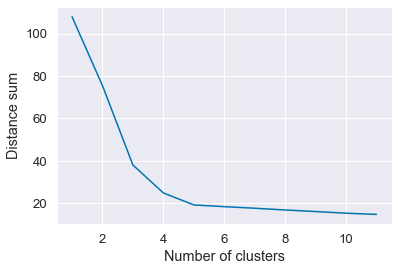

In [46]:
fig, ax = plt.subplots()
plt.plot(n_clusters, dist_sum)
# plt.plot(5, dist_sum[4], 'o', color='red')
ax.set_xlabel(r'Number of clusters')
ax.set_ylabel(r'Distance sum')
plt.show();

We observe the elbow (the point at which the curve bends visibly for the last time) at a **cluster number of 5**, which was indeed our original choice: 

`X_blobs, y_blobs_true, centres_blobs_true = make_blobs(n_samples=400, 
                                                       n_features=2, 
                                                       centers=5, 
                                                       cluster_std=0.70, 
                                                       random_state=42,
                                                       center_box=(-7, 7),
                                                       return_centers=True)`

## II.3 Gaussian mixture models

Above, we discussed that the simple k-means approach has issues when dealing with data of different densities as well as non-circular shaped clusters (spheres in higher dimensions). This algorithm is not able to e.g. recognise elliptical clusters. We will now discuss a more flexible clustering approach, so-called Gaussian mixture models (GMMs), already briefly mentioned above.

Although based on a similar expectation-maximisation algorithm as the k-means model, the GMM is based on determining and optimising the cluster assignment based on **probabilistic weights**. This has the additional advantage of providing probabilities for each data point to belong to a certain cluster. In contrast to the k-means approach, where a data point either belongs to a given cluster or not, we will obtain smooth Gaussian models for each clusters and avoid *hard* edges.

### II.3.1 The basics

A GMM aims at finding a mixture of multi-dimensional Gaussian probability distributions that best model our input dataset. In the simplest case, a GMM can be used to find clusters in the same way as we did before (following again the steps, outlined above) using the `GaussianMixture` method (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) in `scikit-learn`:

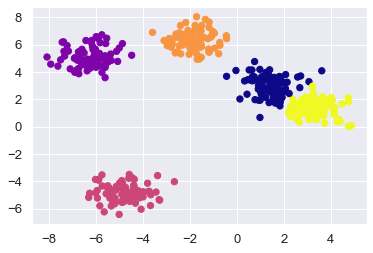

In [47]:
from sklearn.mixture import GaussianMixture  # step A - choose model

gmm = GaussianMixture(
    n_components=5, random_state=42
)  # step B - generate instance
gmm.fit(X_blobs)  # step D - fit the data
y_blobs_gmm = gmm.predict(X_blobs)  # step E - predict labels

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_gmm, s=40, cmap="plasma")
plt.show();

However, in addition to the simple cluster association, the GMM is based on a probabilistic method, so we can assign each point a certain probability of belonging to a given cluster. We can obtain this information using the `predict_proba()` method, which returns a matrix of size (n_samples) x (n_clusters).

In [48]:
y_blobs_probs = gmm.predict_proba(X_blobs)
print(y_blobs_probs[:3].round(4))

[[0.     0.     1.     0.     0.    ]
 [0.0079 0.     0.     0.     0.9921]
 [0.     0.     1.     0.     0.    ]]


One way to illustrate this is by assigning each point a size reflecting the certainty of its prediction. We extract the largest probability value for each given point using the `max()` method, square the results to make the differences more visible and rescale overall to 40. As we would expect, the points at the borders of clusters (those close to the blue and yellow groups) are smallest.

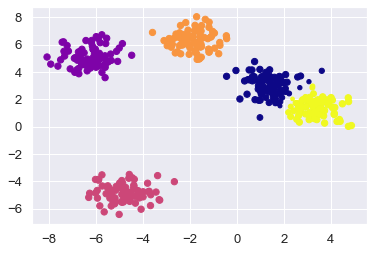

In [49]:
size = 40 * y_blobs_probs.max(axis=1) ** 2
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_gmm, s=size, cmap="plasma")
plt.show();

Another common way to represent the prediction uncertainty is to draw the Gaussian probability distributions for each cluster based on the output of the GMM fit, using the `weights`, `means` and `covariances` attributes (again called with trailing underscores).

Note that one of the hyperparameters of the GMM is the `covariance_type`. We did not specifically specify this parameter above, but the following options are available: 
* full (default): each component has its own general covariance matrix
* tied: all components share the same general covariance matrix
* diag: each component has its own diagonal covariance matrix
* spherical: each component has its own single variance

In each case, the output when calling the `covariances` attribute (and the resulting Gaussians) are different. In the following, we will focus on the default set-up, where the output has the shape `(n_components, n_features, n_features)`. 

In [50]:
# Note that these only work after you have applied .fit() to gmm
print('Weights:', gmm.weights_)
print('Means:', gmm.means_)
print('Covariances:', gmm.covariances_)

Weights: [0.20506576 0.20000587 0.2        0.20000074 0.19492763]
Means: [[ 1.4022143   2.92850818]
 [-6.22327547  5.08820781]
 [-4.812946   -4.85346126]
 [-1.85198551  6.30942938]
 [ 3.329814    1.4110883 ]]
Covariances: [[[ 0.46899506 -0.08321594]
  [-0.08321594  0.57726882]]

 [[ 0.48488918  0.04140205]
  [ 0.04140205  0.49036368]]

 [[ 0.56254344  0.00377321]
  [ 0.00377321  0.40854673]]

 [[ 0.39598342  0.00288231]
  [ 0.00288231  0.47084874]]

 [[ 0.45670812 -0.06932626]
  [-0.06932626  0.42143238]]]


In particular, we can use information from the covariance matrices (for details see https://en.wikipedia.org/wiki/Covariance_matrix, https://en.wikipedia.org/wiki/Singular_value_decomposition and https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) for each cluster to determine the principal axes and size of Gaussian **ellipses** and plot them using `matplotlib's` `patches` module.

In [51]:
from matplotlib.patches import Ellipse


def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse for a given position and covariance matrix"""

    # Get current axes
    ax = ax or plt.gca()

    # Convert covariance matrix into principal axes and size using
    # singular value decomposition to obtain eigenvectors / eigenvalues
    u, s, vh = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(u[1, 0], u[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw ellipses for different sigma
    for n_sig in range(1, 5):
        ax.add_patch(
            Ellipse(position, n_sig * width, n_sig * height, angle, **kwargs)
        )


def plot_gmm(gmm, X, ax=None):
    """Plot the data plus ellipses"""

    # Get current axes
    ax = ax or plt.gca()

    # Fit and predict on the data
    labels = gmm.fit(X).predict(X)

    # Plot the data as a scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap="plasma", zorder=2)

    # Add ellipses on top based on GMM output and
    # adjust alpha value according to respective cluster weight
    w_factor = 0.1 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


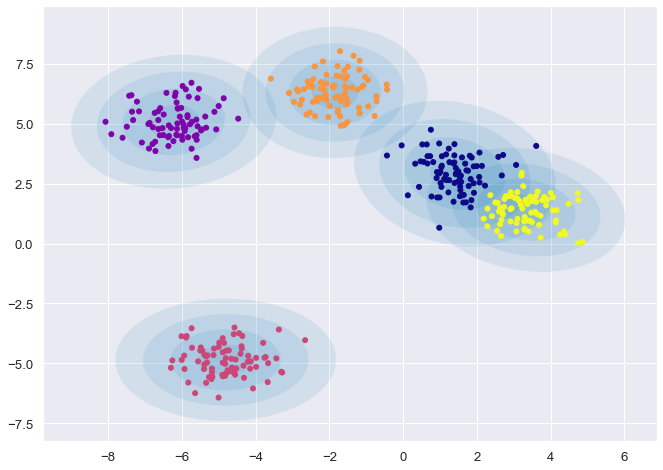

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
gmm = GaussianMixture(n_components=5, random_state=42)
plot_gmm(gmm, X_blobs)
plt.show();

In the same way, we can apply this to our reshaped, elongated blobs, to see that the GMM does much better at recovering the clusters than the k-means algorithm.

In [54]:
# Reshape blob feature matrix by multiplying with another 2x2 matrix
rng = np.random.RandomState(10)
X_blobs_reshaped = np.dot(X_blobs, rng.randn(2, 2))
print(rng.randn(2, 2))

[[ 0.62133597 -0.72008556]
 [ 0.26551159  0.10854853]]


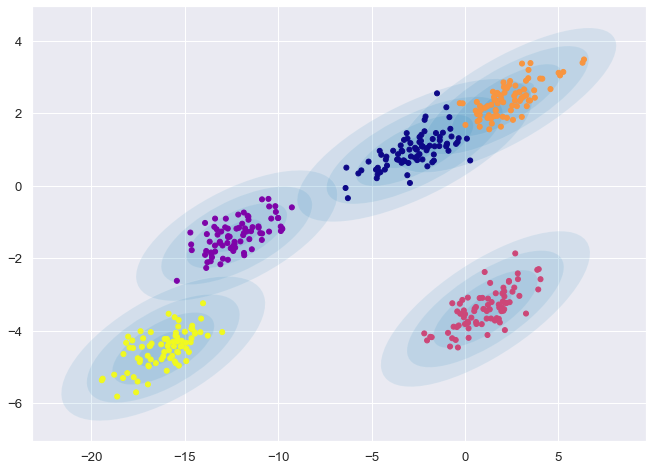

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
gmm = GaussianMixture(n_components=5, random_state=42)
plot_gmm(gmm, X_blobs_reshaped)
plt.show();

### II.3.2 Optimal cluster numbers

As the GMM is based on a probabilistic approach, we cannot directly use the same parameter (the sum of data points / cluster centres distances) as we did for the k-means algorithm to determine the optimal cluster number using the elbow method. 

However, the GMM in principle provides information about the **underlying probability distribution** of our dataset (it can essentially be viewed as a generative model; if you are interested in more details see https://en.wikipedia.org/wiki/Generative_model). As such it encodes information about the **likelihood** (https://en.wikipedia.org/wiki/Likelihood_function) of the data given the model and we can use standard statistical concepts to help us select the best model.

One such concept is the **Bayesian (or Schwarz) information criterion** (BIC) (https://en.wikipedia.org/wiki/Bayesian_information_criterion). While the likelihood can be improved by adding more and more parameters to our model when fitting a dataset, this will eventually result in **overfitting**. The BIC addresses this issue by introducing a penalty term for the number of model parameters. The preferred model is the one that results in the **lowest BIC**. 

Evaluating this criterion (essentially a numerical value) is straightforward in `scikit-learn` as the `GaussianMixture` estimator includes a **built-in method** to compute the BIC (see https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.bic). 

Returning to our blob example, we can obtaint the following curve for different component numbers:

In [ ]:
BIC_blobs = []
n_components = range(1, 12)

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_blobs)
    BIC_blobs.append(gmm.bic(X_blobs))

print(BIC_blobs)

In [ ]:
fig, ax = plt.subplots()
plt.plot(n_components, BIC_blobs)
plt.plot(5, BIC_blobs[4], 'o', color='red')
ax.set_xlabel(r'Number of components')
ax.set_ylabel(r'BIC')
plt.show();

In [ ]:
n_components[np.where(BIC_blobs == min(BIC_blobs))[0][0]]

As illustrated in the plot above, the BIC is minimised not for our original choice of 5 but 4 Gaussian components (although the values are very similar). This highlights that (as for the elbow method) it might not always be possible to determine the *correct* number of clusters using just one single criterion to select the optimal model. Ideally, multiple metrics should be explored for this purpose. Another option also built-in in `scikit-learn` could e.g. be the Akaike information criterion (AIC) https://en.wikipedia.org/wiki/Akaike_information_criterion.

### II.3.3 Astro example - pulsars

In the following, we will look at the properties of **pulsars**. Pulsars (https://en.wikipedia.org/wiki/Pulsar) are a special class of **neutron stars** (https://en.wikipedia.org/wiki/Neutron_star), a type of compact object with radii on the order of 10km and masses of 1-2 solar masses. As a result of their fast rotation and strong magnetic fields, these pulsars emit pulsed radiation (mainly in the radio band) very much like a light house. These pulses are detectable with telescopes and allow us to measure their (very stable) **rotation period** as well as their **period derivatives**. As we will see below, both quantities provide insight into the different manifestations of pulsars. 

<img src="./pulsar.gif" width="300">

The data set we will work with is available over the **pulsar catalogue interface** of the ATNF (Australia Telescope National Facility) https://www.atnf.csiro.au/research/pulsar/psrcat/. In order to load and manipulate the data, we will use the `Pandas` library https://pandas.pydata.org/.

In [ ]:
import pandas as pd

# Load the downloaded data as .txt file, skip header and specify white spaces as separator
data_atnf = pd.read_csv("atnf.txt", skiprows=4, sep='\s+', header=None)

# Print the head of the full data frame
data_atnf.head()

In [ ]:
# Removing the columns we do not need for our analysis
data_atnf = data_atnf.drop([0, 1, 2, 4, 6, 7, 9, 10, 12], axis=1)

# Giving the remaining columns meaningful names
data_atnf.columns = ['Name', 'Period [s]', 'Period derivative [s/s]', 'Companion', 'Type']

# Replacing empty values * with NaNs 
data_atnf['Period [s]'] = data_atnf['Period [s]'].replace('*', np.nan)
data_atnf['Period derivative [s/s]'] = data_atnf['Period derivative [s/s]'].replace('*', np.nan)

# Changing the column format to numeric values
data_atnf['Period [s]'] = pd.to_numeric(data_atnf['Period [s]'])
data_atnf['Period derivative [s/s]'] = pd.to_numeric(data_atnf['Period derivative [s/s]'])

data_atnf.head()

For our purposes, it is also useful to modify the final two columns to not contain individual binary models but only reflect those cases, where the pulsar is known to have a companion, as well as simplifying the `Type` column. For details on the different colums see the official documentation https://www.atnf.csiro.au/research/pulsar/psrcat/psrcat_help.html.

In [ ]:
data_atnf['Companion'].value_counts()

In [ ]:
data_atnf['Type'].value_counts()

In [ ]:
# A few more modifications to adjust the output of the last two columns
data_atnf.loc[data_atnf["Companion"] != "*", "Companion"] = 'C'
data_atnf.loc[data_atnf['Type'].str.contains('HE'), 'Type'] = 'HE' 
data_atnf.loc[data_atnf['Type'].str.contains('RRAT'), 'Type'] = 'RRAT'
data_atnf.loc[data_atnf['Type'].str.contains('XINS'), 'Type'] = 'XINS'
data_atnf.loc[data_atnf['Type'].str.contains('AXP'), 'Type'] = 'AXP'
data_atnf.loc[data_atnf['Type'].str.contains('NRAD'), 'Type'] = 'NRAD'
data_atnf.loc[data_atnf['Type'].str.contains('BINARY'), 'Type'] = '*'
data_atnf.head()

In [ ]:
data_atnf['Companion'].value_counts()

In [ ]:
data_atnf['Type'].value_counts()

Considering the magnitudes of the period and period derivative measurements, it is useful to not work with the values directly but the logarithm of the numerical values. We can create two new respective feature columns in the data frame (making sure to only apply the logarithm to those objects that have a positive derivative):

In [ ]:
data_atnf[data_atnf['Period derivative [s/s]'] < 0].head()

In [ ]:
# Generating new feature columns
data_atnf['Log period'] = np.log10(data_atnf['Period [s]'])

data_atnf['Log period derivative'] = np.log10(
    # Apply a mask to only obtain positive derivatives
    data_atnf['Period derivative [s/s]'][data_atnf['Period derivative [s/s]'] > 0]  
)

data_atnf.head()

We can now plot all objects with a log period and period derivative value into a **PPdot diagram**, one of the main tools to study the pulsar population.

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(
    data=data_atnf,
    x="Log period",
    y="Log period derivative",
    hue="Type",
    style="Companion",
)
plt.show()

Note that we have plotted the different types as identified in the ATNF catalogue with a different colour and used different point styles to differentiate those objects that have a companion and those that do not. In the following, we will look at this distribution of data points and apply a Gaussian mixture model to see which kind of clusters the algorithm can identify.

### II.3.4 Applying the GMM

With all the work we have done so far, it is straight forward to apply a GMM to the above data exploring different numbers of components.

First, we manipulate our above data frame into the **feature matrix**:

In [ ]:
X_pulsars = data_atnf.drop(['Name', 'Period [s]', 'Period derivative [s/s]', 'Companion', 'Type'], axis=1)
X_pulsars = X_pulsars.dropna()  # Drop the remaining NaN from the data
X_pulsars.head()

In [ ]:
BIC_pulsars = []
n_components = range(1, 12)

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pulsars)
    BIC_pulsars.append(gmm.bic(X_pulsars))

print(BIC_pulsars)

In [ ]:
fig, ax = plt.subplots()
plt.plot(n_components, BIC_pulsars)
ax.set_xlabel(r'Number of components')
ax.set_ylabel(r'BIC')
plt.show();

In [ ]:
n_components[np.where(BIC_pulsars == min(BIC_pulsars))[0][0]]

We thus conclude using the BIC for model selection, the **optimal number of components** is 7. 

Using this to fit the data, we obtain the following PPdot diagram

In [ ]:
gmm_pulsars = GaussianMixture(
    n_components=7, random_state=42
)  # step B - generate instance
gmm_pulsars.fit(X_pulsars)  # step D - fit the data
y_pulsars_gmm = gmm_pulsars.predict(X_pulsars)  # step E - predict labels

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.scatterplot(
    data=X_pulsars,
    x="Log period",
    y="Log period derivative",
    hue=y_pulsars_gmm,
    palette="plasma",
)
plt.show()

We can also similarly draw our Gaussian ellipses (noticing that the weights of the clusters overall are smaller than in our simple blob example from above):

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
gmm_pulsars = GaussianMixture(n_components=7, random_state=42)
plot_gmm(gmm_pulsars, X_pulsars.values)  # Call .values to extract the column values
plt.show();

In [ ]:
gmm_pulsars.weights_

We observe that the clustering has resulted in two types of groups representing those objects typically referred to as **millisecond pulsars** (those in the lower left of the diagram). An additional group is present in the upper right, which are those objects usually called **magnetars**. Those neutron stars are objects that we can indeed distinguish based upon additional characteristics (companion and high X-ray activity, respectively).

For the remaining pulsars, forming the **bulk of the population**, which are separated into four clusters, it is less easy to find an association with physically *distinct* types of pulsars. Group 3 has some resemblance with the young objects emitting at high energies and not radio (HE and NRAD in the ATNF data base), but otherwise pulsars of group 1, 4, and 6 are usually not associated with different phenomenology. Also note that we do not *recover* the objects referred to as RRATs and XINS in the pulsar catalogue, both containing only a small number of objects significantly overlapping with the other clusters, thus making it more difficult to recover them. 

This example highlights the limitations of our simple GMM approach and emphasises that we need to be cautious when interpreting the output of the machine learning model. 

### II.3.5 DISCUSSION SESSION: Other astro examples

Can you think of additional examples (or have you heard of some) in astronomy and astrophysics, where such cluster based approaches could be useful and provide insides into the underlying phenomena?